In [ ]:
pip install --upgrade pandas pip install --upgrade pandas-datareader

     |████████████████████████████████| 2.1 MB 10.5 MB/s 
     |████████████████████████████████| 109 kB 42.7 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
pip install pandas-datareader


In [ ]:
!pip install pystan fbprophet


In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [ ]:
# Data1 Using static Dataset from Yahoo Finance, data from 2014 afterwards
data_btc = pd.read_csv('BTC-USD.csv')

In [ ]:
# Data2 Getting Yahoo Finance from pdr = data from 2020 afterwards
data_btc = pdr.get_data_yahoo('USD')

In [ ]:
data_btc.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-17,6.471667,6.431667,6.471667,6.470833,15600.0,6.312748
2017-03-20,6.595833,6.534167,6.546667,6.534167,54000.0,6.374536
2017-03-21,6.620000,6.294167,6.620000,6.294167,70800.0,6.140399
2017-03-22,6.378333,6.225833,6.279167,6.378333,55200.0,6.231749
2017-03-23,6.390833,6.356667,6.370833,6.356667,12000.0,6.210580


In [ ]:
data_btc.info

<bound method DataFrame.info of             Date          Open          High           Low         Close  \
0     2014-10-16    394.518005    398.807007    373.070007    382.556000   
1     2014-10-17    382.756012    385.477997    375.389008    383.757996   
2     2014-10-18    383.976013    395.157990    378.971008    391.441986   
3     2014-10-19    391.253998    393.938995    386.457001    389.545990   
4     2014-10-20    389.230988    390.084015    378.252014    382.845001   
...          ...           ...           ...           ...           ...   
2704  2022-03-12  38794.464844  39308.597656  38772.535156  38904.011719   
2705  2022-03-13  38884.726563  39209.351563  37728.144531  37849.664063   
2706  2022-03-14  37846.316406  39742.500000  37680.734375  39666.753906   
2707  2022-03-15  39664.250000  39794.628906  38310.210938  39338.785156   
2708  2022-03-16  39304.621094  41465.453125  39041.468750  40769.937500   

         Adj Close       Volume  
0       382.556000   

In [ ]:
# For Data2 - Transforming the index in a Date columns
data_btc=data_btc.reset_index()

In [ ]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [ ]:
# For Data2
data_btc.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [ ]:
# For Data1
data_btc.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
data_btc.head()

,Date,Close
0,2017-03-17,6.470833
1,2017-03-20,6.534167
2,2017-03-21,6.294167
3,2017-03-22,6.378333
4,2017-03-23,6.356667


In [ ]:
data_btc.columns = ['ds','y']

In [ ]:
data_btc.tail()

,ds,y
1253,2022-03-09,35.139999
1254,2022-03-10,33.759998
1255,2022-03-11,32.340000
1256,2022-03-14,30.219999
1257,2022-03-16,35.340000


In [ ]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2709 non-null   object 
 1   y       2709 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.5+ KB


In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
# Check the code below
model = m.fit(data_btc)

In [ ]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-03-17,6.478329,-0.928013,9.516131,6.478329,6.478329,-2.255537,-2.255537,-2.255537,0.091385,...,-0.040253,-0.040253,-0.040253,-2.306669,-2.306669,-2.306669,0.0,0.0,0.0,4.222791
1,2017-03-20,6.517031,-0.881524,9.953652,6.517031,6.517031,-1.909604,-1.909604,-1.909604,0.091385,...,-0.052079,-0.052079,-0.052079,-1.948910,-1.948910,-1.948910,0.0,0.0,0.0,4.607427
2,2017-03-21,6.529932,-0.529166,10.385655,6.529932,6.529932,-1.638245,-1.638245,-1.638245,0.091385,...,0.083587,0.083587,0.083587,-1.813217,-1.813217,-1.813217,0.0,0.0,0.0,4.891687
3,2017-03-22,6.542833,-0.116073,9.931809,6.542833,6.542833,-1.552058,-1.552058,-1.552058,0.091385,...,0.029470,0.029470,0.029470,-1.672913,-1.672913,-1.672913,0.0,0.0,0.0,4.990775
4,2017-03-23,6.555734,-0.079990,10.607958,6.555734,6.555734,-1.436622,-1.436622,-1.436622,0.091385,...,0.002121,0.002121,0.002121,-1.530128,-1.530128,-1.530128,0.0,0.0,0.0,5.119112


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2804,2022-06-20,65856.515450,53451.600604,75526.618435,64922.141059,66736.234274,-1345.030900,-1345.030900,-1345.030900,-533.385273,...,6.580719,6.580719,6.580719,-818.226346,-818.226346,-818.226346,0.0,0.0,0.0,64511.484550
2805,2022-06-21,65927.452044,52379.064160,75624.139761,64971.252359,66817.747867,-1406.518072,-1406.518072,-1406.518072,-533.385273,...,-21.553015,-21.553015,-21.553015,-851.579784,-851.579784,-851.579784,0.0,0.0,0.0,64520.933972
2806,2022-06-22,65998.388638,52333.052871,75839.658466,65028.662085,66902.430702,-1418.438379,-1418.438379,-1418.438379,-533.385273,...,6.453063,6.453063,6.453063,-891.506169,-891.506169,-891.506169,0.0,0.0,0.0,64579.950258
2807,2022-06-23,66069.325231,53548.550598,76338.838107,65086.320404,66996.700399,-1474.388933,-1474.388933,-1474.388933,-533.385273,...,-3.433441,-3.433441,-3.433441,-937.570219,-937.570219,-937.570219,0.0,0.0,0.0,64594.936298
2808,2022-06-24,66140.261825,54072.430433,76175.335758,65143.978723,67080.166685,-1516.566485,-1516.566485,-1516.566485,-533.385273,...,6.019537,6.019537,6.019537,-989.200750,-989.200750,-989.200750,0.0,0.0,0.0,64623.695340


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2017-03-17,4.222791
1,2017-03-20,4.607427
2,2017-03-21,4.891687
3,2017-03-22,4.990775
4,2017-03-23,5.119112
...,...,...
1353,2022-06-20,50.072276
1354,2022-06-21,50.220309
1355,2022-06-22,50.179451
1356,2022-06-23,50.167173


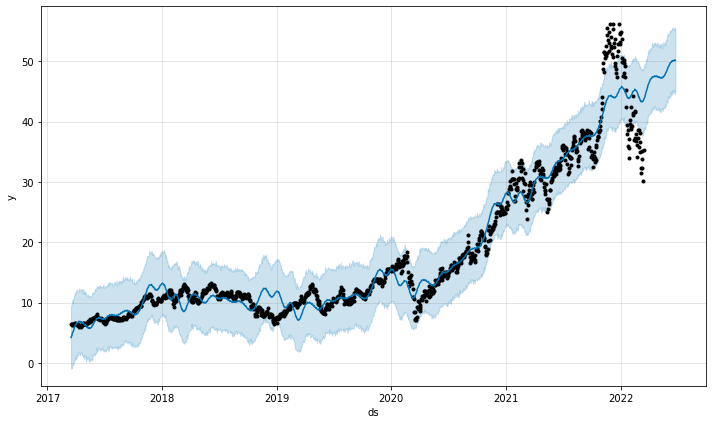

In [ ]:
plot1 = m.plot(forecast)

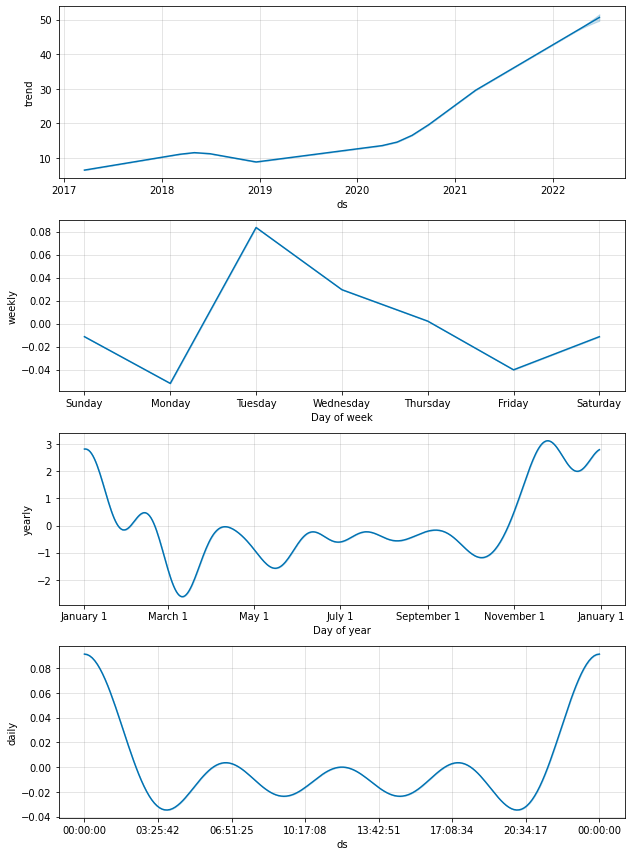

In [ ]:
plot2 = m.plot_components(forecast)